In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define a linear model function
def linear(a, x, b):
    return (a*x + b)
#define an exponential model function
def exponential(a, x, b):
    return (b*np.e**(-a*x))

In [3]:
#import data
x, counts_exp = np.loadtxt("RadioactiveDecay_TuesdayOct2_2018_decay.txt", skiprows = 2, delimiter = '\t', unpack = True)

In [4]:
#import background radiation data
sample_bg, counts_bg = np.loadtxt("RadioactiveDecay_TuesdayOct2_2018_background.txt", skiprows = 2, delimiter = '\t', unpack = True)

#take the mean of the background radiation counts
mean = np.mean(counts_bg)
#subtract the counts from the background data from the reported data
counts = counts_exp - mean
x = x*20

In [5]:
#calculate the standard deviation for the counts
sigma_counts = np.std(counts)

In [6]:
#set a time interval for 20s
dt = 20
#calculate the rates
R = (counts/dt)
#calculate the error in the rates
R_error = (np.sqrt(counts))/dt
#calculate the error in the samples (x data)
sample_error = (np.sqrt(R))

In [7]:
#store p_opt and p_cov from the linear fit function
p_opt, p_cov = curve_fit(linear, x, np.log(R), sigma = R_error, p0 = (1,1), absolute_sigma = True)
#store the optimal slope
m_opt = p_opt[0]
#store the optimal b value
b_opt = p_opt[1]

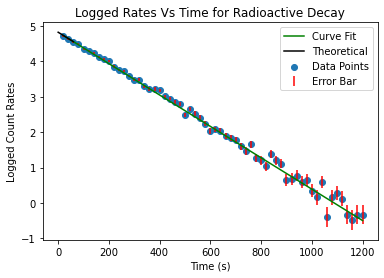

In [8]:
#plot the linear data
plt.scatter(x, np.log(R), label = "Data Points")
plt.ylabel("Logged Count Rates")
plt.xlabel("Time (s)")
plt.title("Logged Rates Vs Time for Radioactive Decay")

#plot the curve fit
plt.plot(x, linear(m_opt, x, b_opt), color = 'green', label = "Curve Fit")

#plot error bars
plt.errorbar(x, np.log(R),yerr = R_error/R,color = 'red',ls = "none",label = "Error Bar")

#create array for theoretical x values
x_theo = np.zeros(21)
for i in range(0, x_theo.size):
    x_theo[i] = 3*i

#plot theoretical values
plt.plot(x_theo, linear(m_opt, x_theo, b_opt), color = "black", label = "Theoretical")

#plot legend
plt.legend(loc = "upper right")

In [9]:
#store p_opt1 and p_cov1 from the linear fit function
p_opt1, p_cov1 = curve_fit(exponential, x, R, p0 = (.5, 1), sigma = R_error, absolute_sigma = True)
#store the optimal slope
m_opt1 = p_opt1[0]
#store the optimal b value
b_opt1 = p_opt1[1]

<ipython-input-2-2ce989384f1c>:6: RuntimeWarning: overflow encountered in power
  return (b*np.e**(-a*x))


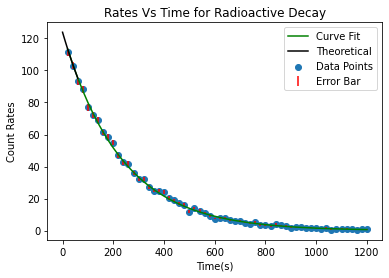

In [10]:
#plot the exponential graph
plt.scatter(x, R, label = "Data Points")
plt.ylabel("Count Rates")
plt.xlabel("Time(s)")
plt.title("Rates Vs Time for Radioactive Decay")

#plot the curve fit
plt.plot(x, exponential(m_opt1, x, b_opt1),  color = 'green', label = "Curve Fit")
#plot the error bars
plt.errorbar(x, R ,yerr = R_error, color = 'red', ls = "none" ,label = "Error Bar")

#store theoretical x values
x_theo2 = np.zeros(21)
for i in range(0, x_theo2.size):
    x_theo2[i] = 3*i

#plot theoretical data
plt.plot(x_theo2, exponential(m_opt1, x_theo2, b_opt1), color = "black", label = "Theoretical")

#plot the legend
plt.legend(loc = "upper right")

In [11]:
#calculate and output hlflife for the linear plot
halflife_linear = ((-1/m_opt*np.log(2)))/60
halflife_linear

2.6073152937361175

In [12]:
#calculate and output the halflife for the exponential plot
halflife_log = ((1/m_opt1*np.log(2)))/60
halflife_log

2.64178255004885

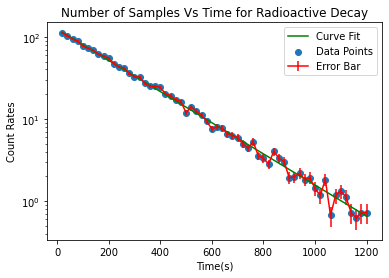

In [13]:
#Plot the data on a log axis
plt.scatter(x, R, label = "Data Points")
plt.ylabel("Count Rates")
plt.xlabel("Time(s)")
plt.title("Number of Samples Vs Time for Radioactive Decay")

plt.plot(x, exponential(m_opt1, x, b_opt1),  color = 'green', label = "Curve Fit")
plt.errorbar(x, R ,yerr = R_error, color = 'red', label = "Error Bar")

plt.legend(loc = "upper right")

plt.yscale('log')

In [14]:
#calculate and output halflife error for the linear function (variance)
halflife_error = np.sqrt(p_cov[0,0])
halflife_error/halflife_linear

9.47930322980892e-05

In [15]:
#calculate and output halflife error for the exponential function (variance)
halflife_error = np.sqrt(p_cov1[0,0])
halflife_error/halflife_log

1.0808520150903236e-05

In [16]:
#define chi squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    f = linear(m, xi, b)
    chi = np.sum(((yi-f)**2)/sigma_i**2)
    chi = chi/v
    return chi

In [17]:
#calculate chi-squared for the linear graph
chi1 = chi(x.size, 2, np.log(R),x , R_error/R, m_opt, b_opt)
chi1

1.6094455970054724

In [18]:
#define a chi function using the exponential curve fit
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    f = exponential(m, xi, b)
    chi = np.sum(((yi-f)**2)/sigma_i**2)
    chi = chi/v
    return chi

In [19]:
#calculate nd output chi-squared for the exponential graph
chi2 = chi(x.size, 2, R, x, R_error, m_opt1, b_opt1)
chi2

1.3751686982172657